<a href="https://colab.research.google.com/github/v5v5/data-science-plan/blob/main/Skillbox_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## День 1

**Сегодня**:

— Работа в Google Colab

— Введение в python, pandas

Файл с данными: [trips_data.xlsx](https://drive.google.com/file/d/18Hyh1l9H3bR556W1tO2vKwpfAqZPueEp/view?usp=sharing)

In [ ]:
import pandas

In [ ]:
trips_data = pandas.read_excel("/content/trips_data.xlsx", index_col=0)

In [ ]:
trips_data.tail(3)

,salary,city,age,vacation_preference,transport_preference,family_members,target
997,56000,Краснодар,68,Архитектура,Самолет,2,Paris
998,162000,Краснодар,69,Архитектура,Самолет,0,Sydney
999,171000,Краснодар,35,Архитектура,Автомобиль,1,New York


In [ ]:
trips_data["salary"].describe()

count      1000.000000
mean     111935.000000
std       54580.049073
min           0.000000
25%       68000.000000
50%       99000.000000
75%      161000.000000
max      250000.000000
Name: salary, dtype: float64

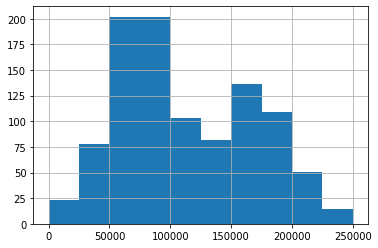

In [ ]:
trips_data["salary"].hist()

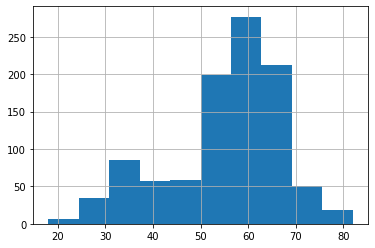

In [ ]:
trips_data["age"].hist()

In [ ]:
trips_data["city"].value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Москва            1
Ярославль         1
Name: city, dtype: int64

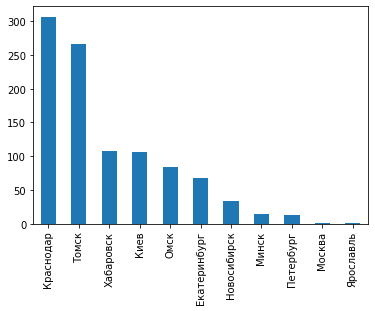

In [ ]:
trips_data["city"].value_counts().plot(kind="bar")

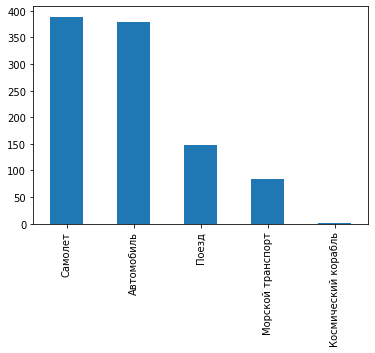

In [ ]:
trips_data["transport_preference"].value_counts().plot(kind="bar")

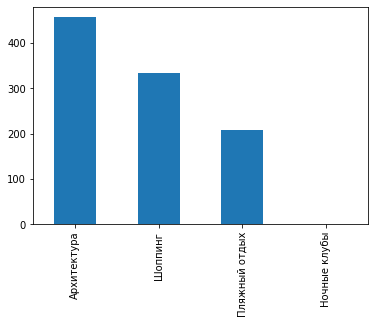

In [ ]:
trips_data["vacation_preference"].value_counts().plot(kind="bar")

## ОБУЧАЕМ МОДЕЛЬ

In [ ]:
trips_data.head(5)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [ ]:
df = pandas.get_dummies(trips_data, columns = ["city", "vacation_preference", "transport_preference"])

In [ ]:
df.head()

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,city_Петербург,city_Томск,city_Хабаровск,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
X = df.drop("target", axis=1) # Все, кроме колонки "Таргет", входные данные модели
y = df["target"] # Только колонка таргет, выход модели

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
my_model = LogisticRegression() # настройки
my_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Оценить качество модели

In [ ]:
{ col:[0] for col in X.columns }

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

In [ ]:
example = {'age': [30],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [1],
 'salary': [140000],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [1],
 'vacation_preference_Архитектура': [1],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

example_df = pandas.DataFrame(example)

In [ ]:
example_df

,age,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,city_Петербург,city_Томск,city_Хабаровск,city_Ярославль,family_members,salary,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг
0,30,0,0,1,0,0,0,0,0,0,0,0,1,140000,0,0,0,0,1,1,0,0,0


In [ ]:
my_model.predict(example_df)

array(['New York'], dtype=object)

In [ ]:
my_model.predict_proba(example_df)

array([[0.14560937, 0.41480541, 0.14849086, 0.14562652, 0.14546784]])

In [ ]:
my_model.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [ ]:
example_df.T

,0
age,30
city_Екатеринбург,0
city_Киев,0
city_Краснодар,1
city_Минск,0
city_Москва,0
city_Новосибирск,0
city_Омск,0
city_Петербург,0
city_Томск,0
